In [137]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100
# A sin wave from 0 to 6pi
X = np.linspace(0, 6*np.pi, N)
Y = np.sin(X)

def make_poly(X, deg):
    n = len(X)
    # Add a column of ones
    data = [np.ones(n)]
    # Add polynomial terms for the num of degrees mentioned
    for d in range(deg):
        # Notice how you can power up the whole array
        data.append(X**(d+1))
    # Pay careful attention to this
    # This should be equivalent to
    # return np.stack(data, axis=0)
    return np.vstack(data).T


def fit(X, Y):
    # Solution to linear regression 
    # for finding the weights in terms of 
    # the inputs and outputs
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y)) 


def fit_and_display(X, Y, num_samples, deg):
    # NOTE: This is a nice way to choose random samples
    N = len(X)
    train_idx = np.random.choice(N, num_samples)
    Xtrain, Ytrain = X[train_idx], Y[train_idx]
    
    # Show the sine wave samples
    plt.scatter(Xtrain, Ytrain)
    plt.show()
    
    # Make polynomial of degree deg and fit it
    Xtrain_poly = make_poly(Xtrain, deg)
    w = fit(Xtrain_poly, Ytrain)
    
    # Display the polynomial
    X_poly = make_poly(X, deg)
    Y_hat = X_poly.dot(w)
    plt.plot(X, Y)
    
    # Also display the predicted polynomial
    plt.plot(X, Y_hat)
    plt.scatter(Xtrain, Ytrain)
    plt.title('deg = %d' % deg)
    plt.show()

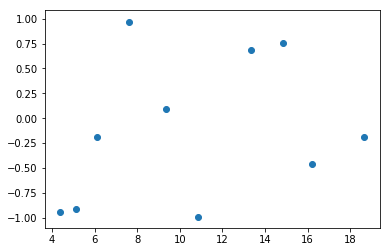

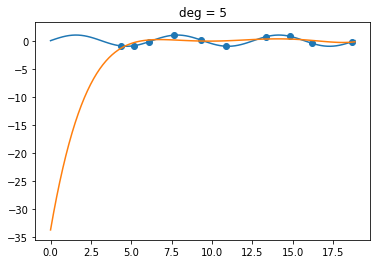

In [9]:
fit_and_display(X, Y, 10, 5)
# Does not pass through all the points

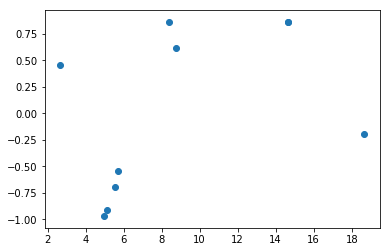

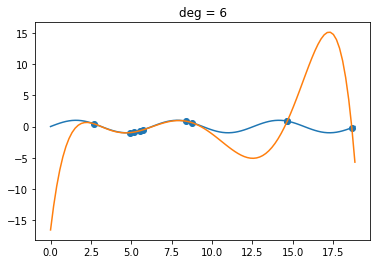

In [13]:
fit_and_display(X, Y, 10, 6)
# Passes through all the points, but does pretty terrible in areas 
#    where there are no training points

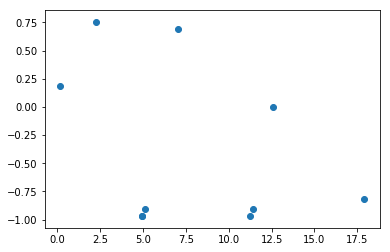

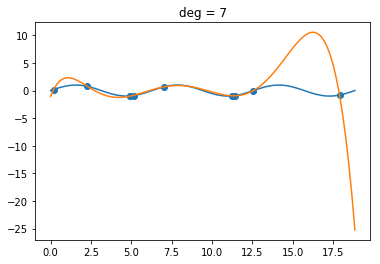

In [17]:
fit_and_display(X, Y, 10, 7)
# Pretty good fit to the training points, 
#    some areas where we're lucky that it generalizes well,
#    but parts where it is off, it is very very off

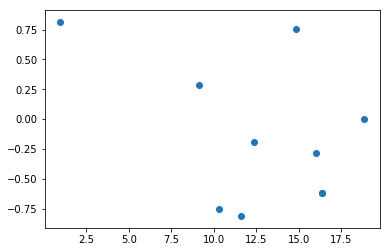

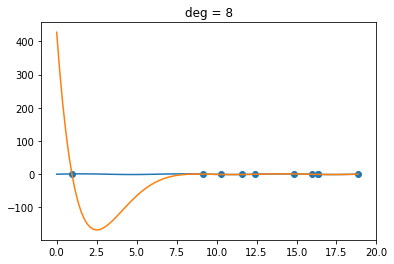

In [55]:
fit_and_display(X, Y, 10, 8)
# Generalized pretty well on the right side, 
#    but not the left where there are not many samples

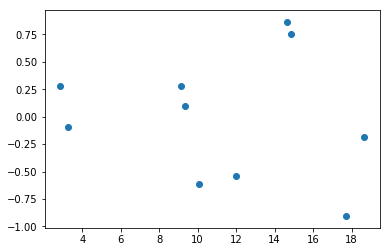

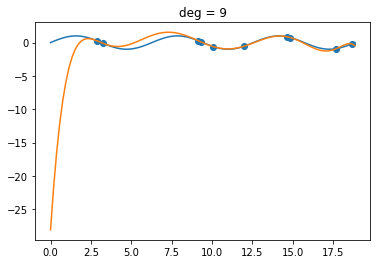

In [64]:
fit_and_display(X, Y, 10, 9)
# Fit is pretty good where there aren't many samples,
#    but seems to be only in the areas between two samples.

In [140]:
def get_mse(Y, Y_hat):
    d = Y - Y_hat
    return d.dot(d) / len(d)


def plot_train_vs_test_curves(X, Y, num_samples=20, max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N, num_samples)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]
    
    test_idx = [idx for idx in range(N) if idx not in train_idx]
    Xtest = X[test_idx]
    Ytest = Y[test_idx]
    
    mse_train_lst = []
    mse_test_lst = []
    
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)
        
        Xtest_poly = make_poly(Xtest, deg)
        w = fit(Xtest_poly, Ytest)
        Yhat_test = Xtest_poly.dot(w)
        mse_test  = get_mse(Ytest, Yhat_test)
        
        mse_train_lst.append(mse_train)
        mse_test_lst.append(mse_test)
        
    plt.plot(mse_train_lst, label='train mse')
    plt.plot(mse_test_lst, label='test mse')
    plt.legend()
    plt.show()

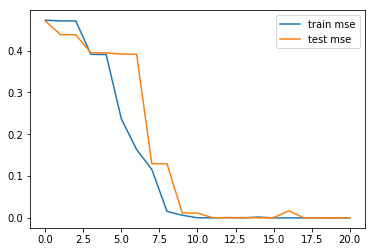

In [70]:
plot_train_vs_test_curves(X, Y)

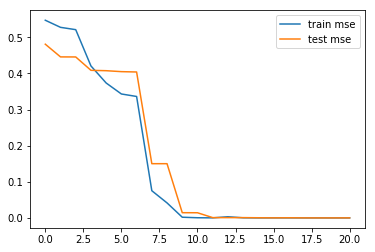

In [71]:
plot_train_vs_test_curves(X, Y)

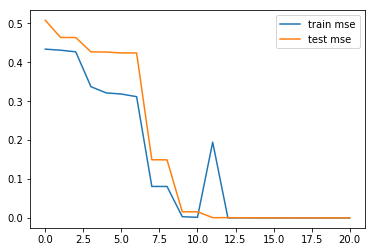

In [104]:
plot_train_vs_test_curves(X, Y)

- High degree poly does not guarantee overfit.
- It all depends on the training data.
    - If your training data is fully representative of the rest of the data...
    - ... the fit will be good no matter what.
    - In terms of the sine wave, if the training data is spread out so that we get an evenly spread out sample for all values of x, then our poly will fit well.
    - If training data is bunched up in a few spots, you see the poly goes wild in spots where there was no training data.
- Lesson: collect lots of varied data.
- Textbook overfitting curves only show one side of the story.

In [136]:
# Exercise - Figure out why there seems like 
#    there isn't any test error even with overfitting

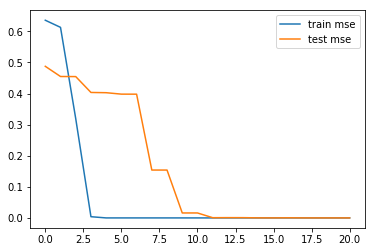

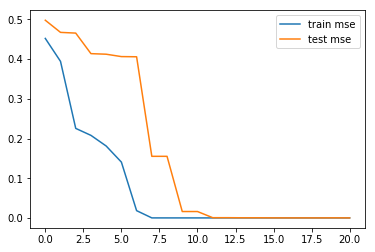

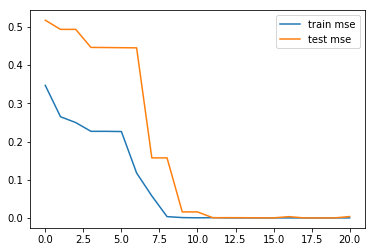

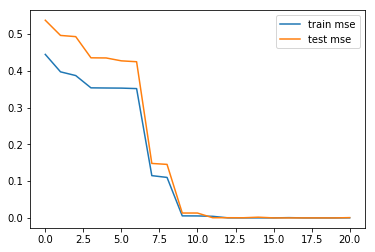

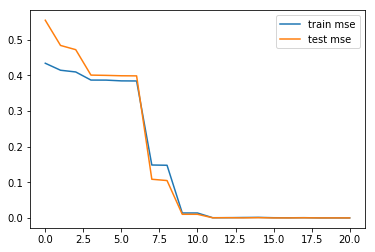

In [141]:
# Trying with variations in sample sizes:
for sample_size in [5, 10, 20, 50, 75]:
    plot_train_vs_test_curves(X, Y, num_samples=sample_size)

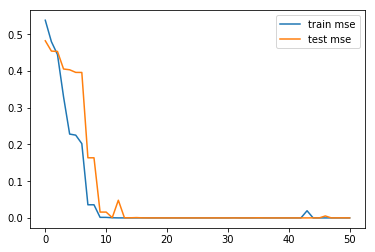

In [143]:
# Higher degree polynomials
plot_train_vs_test_curves(X, Y, max_deg=50)